In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade Pillow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.6/2.6 MB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image
import os

# Define the paths to your data
training_path = r"C:\Users\U.B.A Yadav\Downloads\archive - 2023-12-02T075102.021\PLD_3_Classes_256\Training"
testing_path = r"C:\Users\U.B.A Yadav\Downloads\archive - 2023-12-02T075102.021\PLD_3_Classes_256\Testing"
validation_path = r"C:\Users\U.B.A Yadav\Downloads\archive - 2023-12-02T075102.021\PLD_3_Classes_256\Validation"

# Function to load images from a directory
def load_images_from_directory(directory):
    data = []
    labels = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        for filename in os.listdir(label_path):
            image_path = os.path.join(label_path, filename)
            img = Image.open(image_path)
            # Process the image as needed (resize, normalize, etc.)
            data.append(img)
            labels.append(label)
    return data, labels

# Load training data
train_data, train_labels = load_images_from_directory(training_path)

# Load testing data
test_data, test_labels = load_images_from_directory(testing_path)

# Load validation data
val_data, val_labels = load_images_from_directory(validation_path)

In [4]:
import tensorflow as tf

IMAGE_SIZE = 256
BATCH_SIZE = 32

# Define paths to your data
training_path = r"C:\Users\U.B.A Yadav\Downloads\archive - 2023-12-02T075102.021\PLD_3_Classes_256\Training"
testing_path = r"C:\Users\U.B.A Yadav\Downloads\archive - 2023-12-02T075102.021\PLD_3_Classes_256\Testing"
validation_path = r"C:\Users\U.B.A Yadav\Downloads\archive - 2023-12-02T075102.021\PLD_3_Classes_256\Validation"

# Create image datasets
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    testing_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 3251 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [5]:
class_names = training_dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

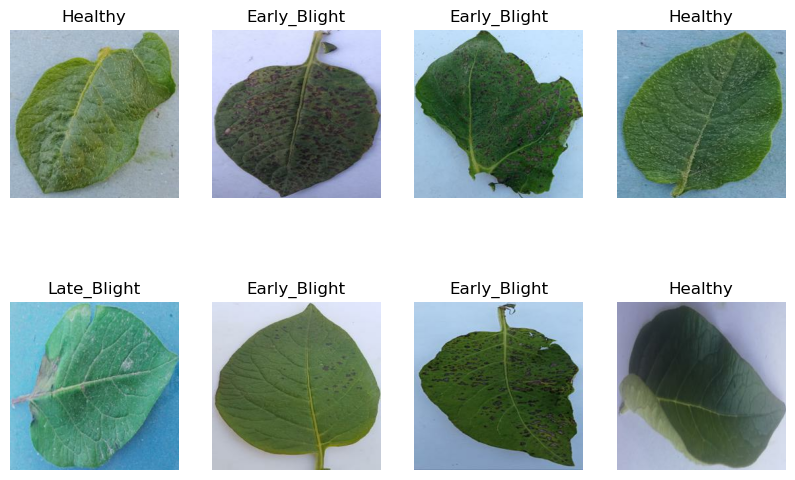

In [7]:
import matplotlib.pyplot as plt


len(training_dataset)
plt.figure(figsize=(10,10))
for image_batch,label_batch in training_dataset.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

# Assuming IMAGE_SIZE is defined somewhere in your script
IMAGE_SIZE = 256

# Create the Sequential model
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

# Example usage:
# processed_image = resize_scale(image)


In [11]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

In [13]:
model.summary()
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [14]:
model.fit(
    training_dataset,
    epochs=50, 
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset
)
model.evaluate(test_data)

Epoch 1/50


102/102 [==============================] - 79s 743ms/step - loss: 1.0031 - accuracy: 0.4882 - val_loss: 0.8458 - val_accuracy: 0.6322
Epoch 2/50
102/102 [==============================] - 73s 718ms/step - loss: 0.7447 - accuracy: 0.6906 - val_loss: 0.6308 - val_accuracy: 0.7452
Epoch 3/50
102/102 [==============================] - 76s 743ms/step - loss: 0.5481 - accuracy: 0.7918 - val_loss: 0.4241 - val_accuracy: 0.8510
Epoch 4/50
102/102 [==============================] - 78s 769ms/step - loss: 0.3819 - accuracy: 0.8705 - val_loss: 0.3810 - val_accuracy: 0.8678
Epoch 5/50
102/102 [==============================] - 82s 799ms/step - loss: 0.3262 - accuracy: 0.8893 - val_loss: 0.3600 - val_accuracy: 0.8750
Epoch 6/50
102/102 [==============================] - 78s 762ms/step - loss: 0.2789 - accuracy: 0.8936 - val_loss: 0.2853 - val_accuracy: 0.8894
Epoch 7/50
102/102 [==============================] - 80s 784ms/step - loss: 0.2394 - accuracy: 0.9129 - val_loss: 0.2478 - val_

[0.03087577596306801, 0.9876543283462524]